# Lab 1 

Sierra Wilde

## A little statistics

### 1.

#### A.

I looked it up.

#### B.

In [1]:
import numpy as np
import scipy as sp
from scipy import special
from scipy import stats
import matplotlib.pyplot as plt

Loop through standard deviations -3 to 3 to find the probabilities:

In [13]:
for i, j in enumerate(range(-3, 4)):
    print('Standard Deviation: {} Probability: {}'.format(i-3, stats.norm.cdf(j)))

Standard Deviation: -3 Probability: 0.0013498980316300933
Standard Deviation: -2 Probability: 0.022750131948179195
Standard Deviation: -1 Probability: 0.15865525393145707
Standard Deviation: 0 Probability: 0.5
Standard Deviation: 1 Probability: 0.8413447460685429
Standard Deviation: 2 Probability: 0.9772498680518208
Standard Deviation: 3 Probability: 0.9986501019683699


#### C.

Using the probabilities (with rounding) above to find the standard deviation:

In [21]:
prob = [0.0015, 0.02, 0.16, 0.5, 0.84, 0.97, 0.9985]
for j in prob:
    print('Probability: {} Standard Deviation: {}'.format(j, stats.norm.ppf(j)))

Probability: 0.0015 Standard Deviation: -2.9677379253417833
Probability: 0.02 Standard Deviation: -2.053748910631823
Probability: 0.16 Standard Deviation: -0.994457883209753
Probability: 0.5 Standard Deviation: 0.0
Probability: 0.84 Standard Deviation: 0.994457883209753
Probability: 0.97 Standard Deviation: 1.8807936081512509
Probability: 0.9985 Standard Deviation: 2.9677379253417944


#### D.

Negative $\sigma$ values indicate where there are datapoints below the mean in the pdf.

### 2.

#### A.

I choose a Lognormal distribution.

#### B.

$PDF_{lognormal}(x) = \frac{1}{x\sigma \sqrt{2 \pi}}e^{\frac{-(lnx - \mu )^2}{2 \sigma ^2}}$

Making a plot of a lognormal pdf, with a $\mu =$0 and a $\sigma =$1, and plotting it analytically and as a histogram of generated values:

In [45]:
x = np.linspace(0, 10, 10000000)
mu = 0
sigma = 1
pdf = stats.lognorm.pdf(x, 1, loc=0, scale=1)

In [38]:
d = stats.lognorm.rvs(1, loc=0, scale=1, size=100000)

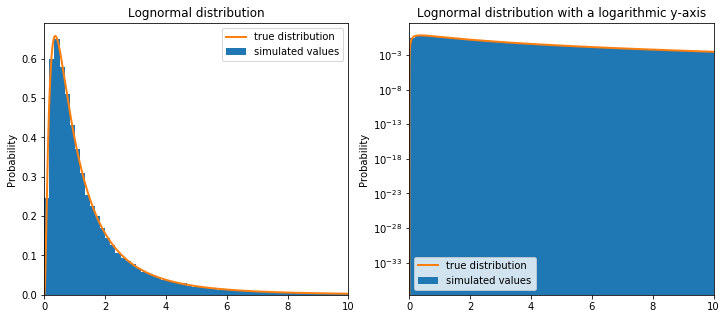

In [76]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].set_title('Lognormal distribution')
ax[0].hist(d, 500, density=True, label='simulated values')
ax[0].plot(x, pdf, linewidth=2, label='true distribution')
ax[0].legend()
ax[0].set_ylabel('Probability')
ax[0].set_xlim(0,10)
ax[1].set_title('Lognormal distribution with a logarithmic y-axis')
ax[1].hist(d, 500, density=True, label='simulated values')
ax[1].plot(x, pdf, linewidth=2, label='true distribution')
ax[1].legend()
ax[1].set_ylabel('Probability')
ax[1].set_xlim(0,10)
ax[1].set_yscale('log')
plt.show()

### 3.

#### A.

I choose the value 6.

#### B.

How likely is it to get a signal-free value of 6 or greater from a background lognormal distribution with a mean of 0 and a standard deviation of 1?

#### C.

$P = \int_{6}^{\infty} \frac{1}{x\sigma \sqrt{2 \pi}}e^{\frac{-(lnx - \mu )^2}{2 \sigma ^2}}dx$

#### D.

In [2]:
probability = 1-stats.lognorm.cdf(6, 1, loc=0, scale=1)
print('The probability of measuring a value of {} or greater is {}'.format(6, probability))

The probability of measuring a value of 6 or greater is 0.03658575191704294


$P = \int_{6}^{\infty} \frac{1}{x\sigma \sqrt{2 \pi}}e^{\frac{-(lnx - \mu )^2}{2 \sigma ^2}}dx = erf(\frac{x}{2})$

$x = 2erf^{-1}(1-P)$, where x is the $\sigma$ value

In [59]:
X = stats.norm.ppf(1-probability)
print('The sigma of the value 6 is {}'.format(X))

The sigma of the value 6 is 1.7917594692280543


### 4.

Finding the $\sigma$s for measurements of 2-10:

In [63]:
for i in range(1, 11):
    #print('The probability of measuring a value of  or greater is {}'.format(1-stats.lognorm.cdf(i, 1, loc=0, scale=1)))
    print('The sigma of the value {} is {}'.format(i, stats.norm.ppf(stats.lognorm.cdf(i, 1, loc=0, scale=1))))

The sigma of the value 1 is 0.0
The sigma of the value 2 is 0.6931471805599453
The sigma of the value 3 is 1.0986122886681096
The sigma of the value 4 is 1.386294361119891
The sigma of the value 5 is 1.6094379124340996
The sigma of the value 6 is 1.7917594692280543
The sigma of the value 7 is 1.945910149055314
The sigma of the value 8 is 2.0794415416798357
The sigma of the value 9 is 2.1972245773362196
The sigma of the value 10 is 2.302585092994044


As the measured value increases, it seems that the corresponding $\sigma$ starts to level off. It is not increasing as fast as it was closer to the mean. This makes sense because the pdf drops off very quickly, and the log plot looks more uniform as the values become greater. This means that the area under the graph past that point, or the probability of getting that value or higher, does not decrease much as the value in question increases.

## Non-continuous distributions

### 1.

#### A.

I am doing the Poisson distribution.

#### B.

$PDF_{poisson} = e^{-\mu}\frac{\mu^k}{k!}$, where k is the number of occurences and $\mu$ is the mean

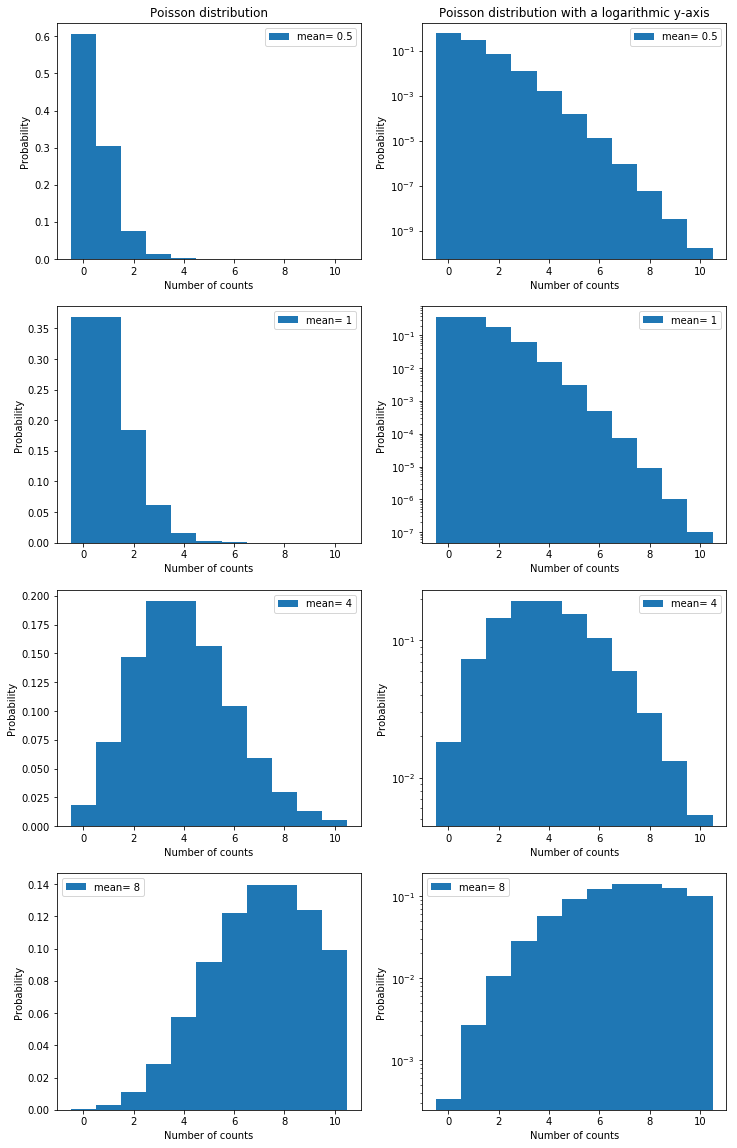

In [84]:
k = np.arange(0, 11)
fig, axes = plt.subplots(4, 2, figsize=(12, 20))
for ax, mean in zip(axes.flat, [0.5, 0.5, 1, 1, 4, 4, 8, 8]):
    ax.bar(k, stats.poisson.pmf(k, mean), width = 1, label = 'mean= {}'.format(mean))
    ax.set_xlabel('Number of counts')
    ax.set_ylabel('Probability')
    ax.legend()
axes[0][0].set_title('Poisson distribution')
axes[0][1].set_title('Poisson distribution with a logarithmic y-axis')
axes[0][1].set_yscale('log')
axes[1][1].set_yscale('log')
axes[2][1].set_yscale('log')
axes[3][1].set_yscale('log')
plt.show()

As the mean approaches the midpoint of the number of counts, the distribution starts to resemble a more Gaussian distribution. If the expected value is at the lower end, there is less of a chance that the number of counts will be at the higher end than if the mean was in the center, and vice versa.

#### C.

What is the probability that a Poisson distribution with an expected count rate of 1.5 will have a number that is 4 or greater?

$x = erf^{-1}(1-\int_{4}^{\infty} e^{-\mu}\frac{\mu^k}{k!}dk)$, where x again is the $\sigma$ corresponding to the measurement

In [87]:
print('The probability of having 4 counts is {}'.format(1-stats.poisson.cdf(4, 1.5)))

The probability of having 4 counts is 0.01857593622214071


In [88]:
print('The sigma value associated with having 4 counts is {}'.format(stats.norm.ppf(stats.poisson.cdf(4, 1.5))))

The sigma value associated with having 4 counts is 2.084091199155898


#### D.

Because there are discrete probabilities and $\sigma$ values, it might be harder to get a significant result. For instance, two consecutive values could have $\sigma$ values of 4.5 and 6.5. In order to get that 5$\sigma$ significance, the result has to be at that higher value, which will be less likely than with a discrete distribution.

#### E.

The mean does not have to be discrete because discrete values multiplied by their probabilities divided by their sum become continuous because their weights can be all continous as well. At a certain mean, the probabilites for each discrete value are discrete as well, but those parameters are able to change continuously together. This is how the $\sigma$ values work as well. The only parameters that have to be discrete no matter what are the count values.